# Car Listings Preprocessing

## Goal:
##### 🔻 Process the cars DataFrame to prepare it for analysis.

## Steps:
    ▼ Outliers Detecting for the column with NaN values
    ▼ Outliers and missing values handling for these columns
    ▼ Handling the outilers on whole dataset 
    ▼ save new df 
    ▼ EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('csv_files/car_df.csv')
df

,Make,Price,Color,Fuel Type,Car Origin,Car License,Transmission Type,Glass,Engine Power,Mileage,Payment Method,Available,Previous Owners,Air Conditioner,Central Locking,Alarm System,CD Player,Sunroof,Alloy Wheels,Leather Seats,Airbag,Passenger Count,age
0,كيا,44000,أسود,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,183000.0,إمكانية التقسيط,للبيع فقط,1.0,1,1,1,1,0,0,1,1,NaN,15
1,هونداي,58000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400,42000.0,نقدا فقط,للبيع أو التبديل,1.0,1,1,1,0,0,1,1,1,4.0,10
2,بيجو,40000,أسود,بنزين,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2000,85000.0,إمكانية التقسيط,للبيع فقط,2.0,1,1,1,1,1,1,1,1,4.0,10
3,سكودا,70000,أزرق,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1900,30000.0,إمكانية التقسيط,للبيع أو التبديل,3.0,1,1,1,1,0,1,1,1,4.0,13
4,سوبارو,33000,رصاصي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1600,NaN,نقدا فقط,للبيع فقط,NaN,1,1,1,1,0,1,0,1,4.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6522,فيات,27000,أحمر,بنزين,خصوصي,فلسطينية,عادي,يدوي,1800,50000.0,نقدا فقط,للبيع فقط,NaN,0,0,0,1,0,0,1,0,NaN,50
6523,هونداي,117000,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,140.0,نقدا فقط,للبيع فقط,NaN,1,1,1,0,1,1,1,1,6.0,7
6524,هونداي,67000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400,40.0,نقدا فقط,للبيع فقط,1.0,1,1,1,1,0,1,1,1,4.0,6
6525,سكودا,58000,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,60000.0,نقدا فقط,للبيع أو التبديل,2.0,1,1,1,1,0,1,0,1,4.0,8


In [3]:
df[df.columns[df.isna().any()]].isna().sum()

Mileage            1782
Previous Owners    1345
Passenger Count     451
dtype: int64

##### Passenger Count

In [4]:
df['Passenger Count'].describe()

count    6076.000000
mean        4.257406
std         1.603875
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max       104.000000
Name: Passenger Count, dtype: float64

All values are on the normal range but the max is to much large , it might be an outlier

In [5]:
df.loc[df['Passenger Count'].idxmax()]

Make                             فورد
Price                           68000
Color                             بني
Fuel Type                       بنزين
Car Origin                      خصوصي
Car License                  فلسطينية
Transmission Type           اوتوماتيك
Glass                        الكتروني
Engine Power                     1600
Mileage                       78000.0
Payment Method        إمكانية التقسيط
Available            للبيع أو التبديل
Previous Owners                   0.0
Air Conditioner                     1
Central Locking                     1
Alarm System                        1
CD Player                           1
Sunroof                             1
Alloy Wheels                        1
Leather Seats                       0
Airbag                              1
Passenger Count                 104.0
age                                 9
Name: 4229, dtype: object

Trying to find similar sample

In [6]:
df[(df['Make'] == 'فورد') & (df['Price'] == 68000) & (df['Fuel Type'] == 'بنزين')]

,Make,Price,Color,Fuel Type,Car Origin,Car License,Transmission Type,Glass,Engine Power,Mileage,Payment Method,Available,Previous Owners,Air Conditioner,Central Locking,Alarm System,CD Player,Sunroof,Alloy Wheels,Leather Seats,Airbag,Passenger Count,age
3237,فورد,68000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,89000.0,نقدا فقط,للبيع أو التبديل,NaN,1,1,1,1,1,1,1,1,4.0,11
4229,فورد,68000,بني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,78000.0,إمكانية التقسيط,للبيع أو التبديل,0.0,1,1,1,1,1,1,0,1,104.0,9


The row have a lot of similarities so we can replace the value of '104' with '4'

In [7]:
df.at[4229, 'Passenger Count'] = df.at[3237, 'Passenger Count']

In [8]:
df['Passenger Count'].describe()

count    6076.000000
mean        4.240948
std         0.966709
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max        22.000000
Name: Passenger Count, dtype: float64

In [9]:
df['Passenger Count']= df['Passenger Count'].fillna(df['Passenger Count'].mode().iloc[-1])
df['Passenger Count'] = df['Passenger Count'].astype(int)

In [10]:
df[df.columns[df.isna().any()]].isna().sum()

Mileage            1782
Previous Owners    1345
dtype: int64

##### Mileage

In [11]:
df['Mileage'].describe()

count    4.745000e+03
mean     1.265937e+18
std      8.720273e+19
min      0.000000e+00
25%      1.070000e+04
50%      7.000000e+04
75%      1.350000e+05
max      6.006870e+21
Name: Mileage, dtype: float64

Mean, std, max have high values might indicate errors | outliers in the data.

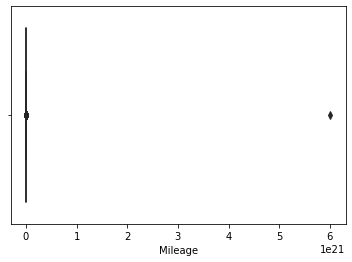

In [12]:
sns.boxplot(x=df['Mileage'],color='g')
plt.show()

In [13]:
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Mileage'] < Q1 - 1.5 * IQR) | (df['Mileage'] > Q3 + 1.5 * IQR)

df_impute = df.copy()
df_impute.loc[outliers, 'Mileage'] = np.nan
zero_mileage = (df_impute['Mileage'] == 0) & (df_impute['age'] > 0) # determining which cars are used & have a Mileage equal to zero
df_impute.loc[zero_mileage, 'Mileage'] = np.nan

imputer = KNNImputer(n_neighbors=5)
df_imputed_values = imputer.fit_transform(df_impute[['Mileage', 'age']])
df.loc[:, ['Mileage', 'age']] = df_imputed_values

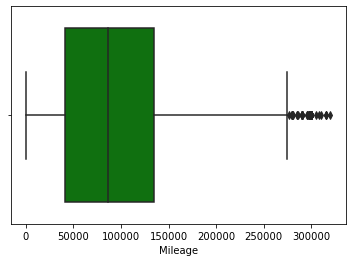

In [14]:
sns.boxplot(x=df['Mileage'],color='g')
plt.show()

we can consider the least outliers as high value of mileage

In [15]:
df['Mileage'].describe()

count      6527.000000
mean      91627.576344
std       63728.923024
min           1.000000
25%       41238.200000
50%       86627.600000
75%      135000.000000
max      320000.000000
Name: Mileage, dtype: float64

In [16]:
df[df.columns[df.isna().any()]].isna().sum()

Previous Owners    1345
dtype: int64

##### Previous Owners

In [17]:
df['Previous Owners'].describe()

count    5182.000000
mean        2.168468
std         1.975429
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: Previous Owners, dtype: float64

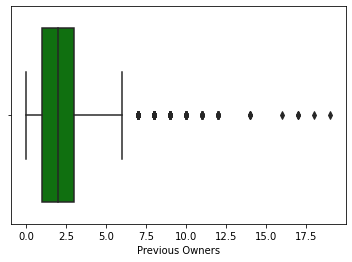

In [18]:
sns.boxplot(x=df['Previous Owners'],color='g')
plt.show()

In [19]:
df['Previous Owners'] = df.groupby(['Car Origin', 'age'])['Previous Owners'].transform(lambda x: x.fillna(x.mean()))

In [20]:
df[df.columns[df.isna().any()]].isna().sum()

Previous Owners    17
dtype: int64

In [21]:
df['Previous Owners'].fillna(df['Previous Owners'].mode().iloc[0], inplace=True)
df['Previous Owners'] = df['Previous Owners'].astype(int)

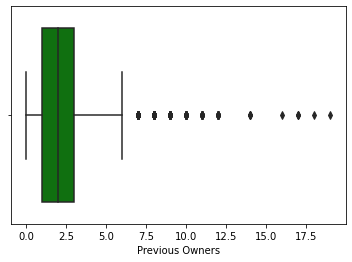

In [22]:
sns.boxplot(x=df['Previous Owners'],color='g')
plt.show()

make sure that the outliers on the graph have an reasonable age

In [23]:
Q1 = df['Previous Owners'].quantile(0.25)
Q3 = df['Previous Owners'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Previous Owners'] < Q1 - 1.5 * IQR) | (df['Previous Owners'] > Q3 + 1.5 * IQR)

df[outliers]['age'].unique()

array([39., 34., 50., 19., 13., 47., 40., 18., 25., 21., 17., 31., 38.,
       10., 28., 15., 41., 37., 26., 16., 36., 23., 33., 44., 35., 22.,
       30., 24., 14., 12., 29., 43., 32., 27., 11., 20.])

It's normal that cars that have these numbers of years have a lot of previous owners so we will not change them

In [24]:
df.isna().any().sum()

0

### There's no missing values on the DataFrame now 

## EDA

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6527 entries, 0 to 6526
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               6527 non-null   object 
 1   Price              6527 non-null   int64  
 2   Color              6527 non-null   object 
 3   Fuel Type          6527 non-null   object 
 4   Car Origin         6527 non-null   object 
 5   Car License        6527 non-null   object 
 6   Transmission Type  6527 non-null   object 
 7   Glass              6527 non-null   object 
 8   Engine Power       6527 non-null   int64  
 9   Mileage            6527 non-null   float64
 10  Payment Method     6527 non-null   object 
 11  Available          6527 non-null   object 
 12  Previous Owners    6527 non-null   int64  
 13  Air Conditioner    6527 non-null   int64  
 14  Central Locking    6527 non-null   int64  
 15  Alarm System       6527 non-null   int64  
 16  CD Player          6527 

In [26]:
for feature in df:
    print(f'{feature}:{df[feature].unique()}\n')

Make:['كيا' 'هونداي' 'بيجو' 'سكودا' 'سوبارو' 'سيت' 'اودي' 'فولكسفاجن' 'Dodge'
 'مرسيدس' 'اوبل' 'شفروليه' 'فورد' 'فولفو' 'ستروين' 'جييب' 'تويوتا'
 'ايسوزو' 'رينو' 'مازدا' 'فيات' 'بي' 'دايو' 'أفيكو' 'الفا' 'ميتسوبيشي'
 'سانغ' 'دراجة' 'شاحنة' 'جي' 'هوندا' 'نيسان' 'داف' 'لاندروفر' 'روفر'
 'داتشيا' 'كاديلاك' 'باص' 'سوزوكي' 'ديهاتسو' 'جاجوار']

Price:[ 44000  58000  40000  70000  33000  78000  18000  30000  60000 125000
  25000  32000  42000  39500 155000  23000  95000 175000  65300  13000
  90000  85000  10000  36500  63000  47000  48000  98000  50000 115000
  27000  24000  35000  86000  19000  68000  39000  45000  56000 100000
 230000 110000  62000  38000  75000 120000  83000 109999  37000 350000
 170000  65000  80000  20000  44999 113000  55000   5000  97000  69000
  41000  89000   6000  72000  75500 107000   9500 163500  62500  49000
  43500  43000  79000  17000 117000  79500 162000   2500  14000  12000
 153000  26500  92000 145000  64000 138000 105000 270000  54000  28500
 135000 118000

Small detail to change : 'Dodge' => 'دودج' on make column 

In [27]:
df['Make'].replace({'Dodge': 'دودج'}, inplace=True)

In [28]:
df.to_csv('csv_files/result.csv', index=False)

#### Feature Engineering

We Already start this step on the previous parts by :
- Drop 'Addition' & 'Drive Type' columns
- Create a new column called 'age' using 'year', and then drop 'year' column
- we can add the column of 'Mileage/Year' from the mileage & age columns

In [29]:
df['Mileage/Year'] = np.where(df['age'] != 0, df['Mileage'] / df['age'], np.nan)
df['Mileage/Year'] = df['Mileage/Year'].round(2)

In [30]:
df

,Make,Price,Color,Fuel Type,Car Origin,Car License,Transmission Type,Glass,Engine Power,Mileage,Payment Method,Available,Previous Owners,Air Conditioner,Central Locking,Alarm System,CD Player,Sunroof,Alloy Wheels,Leather Seats,Airbag,Passenger Count,age,Mileage/Year
0,كيا,44000,أسود,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,183000.0,إمكانية التقسيط,للبيع فقط,1,1,1,1,1,0,0,1,1,4,15.0,12200.00
1,هونداي,58000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400,42000.0,نقدا فقط,للبيع أو التبديل,1,1,1,1,0,0,1,1,1,4,10.0,4200.00
2,بيجو,40000,أسود,بنزين,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2000,85000.0,إمكانية التقسيط,للبيع فقط,2,1,1,1,1,1,1,1,1,4,10.0,8500.00
3,سكودا,70000,أزرق,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1900,30000.0,إمكانية التقسيط,للبيع أو التبديل,3,1,1,1,1,0,1,1,1,4,13.0,2307.69
4,سوبارو,33000,رصاصي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1600,41238.2,نقدا فقط,للبيع فقط,2,1,1,1,1,0,1,0,1,4,24.0,1718.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6522,فيات,27000,أحمر,بنزين,خصوصي,فلسطينية,عادي,يدوي,1800,50000.0,نقدا فقط,للبيع فقط,7,0,0,0,1,0,0,1,0,4,50.0,1000.00
6523,هونداي,117000,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,140.0,نقدا فقط,للبيع فقط,1,1,1,1,0,1,1,1,1,6,7.0,20.00
6524,هونداي,67000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400,40.0,نقدا فقط,للبيع فقط,1,1,1,1,1,0,1,1,1,4,6.0,6.67
6525,سكودا,58000,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,60000.0,نقدا فقط,للبيع أو التبديل,2,1,1,1,1,0,1,0,1,4,8.0,7500.00


In [31]:
df.corr()

,Price,Engine Power,Mileage,Previous Owners,Air Conditioner,Central Locking,Alarm System,CD Player,Sunroof,Alloy Wheels,Leather Seats,Airbag,Passenger Count,age,Mileage/Year
Price,1.000000,0.231600,-0.072708,-0.319212,0.235373,0.212864,0.218042,0.119167,0.297950,0.194235,0.229781,0.239801,0.140248,-0.437462,0.211757
Engine Power,0.231600,1.000000,0.120335,0.017775,0.032058,0.026027,0.074331,0.079532,0.215490,0.048004,0.157693,0.034880,0.291451,0.095129,0.015621
Mileage,-0.072708,0.120335,1.000000,0.102215,0.035769,0.023015,-0.047172,0.023640,-0.018643,-0.009337,-0.049885,0.003997,0.016633,0.079655,0.630254
Previous Owners,-0.319212,0.017775,0.102215,1.000000,-0.281543,-0.244349,-0.188861,-0.071285,-0.069374,-0.087397,-0.101389,-0.276312,-0.029663,0.605540,-0.212473
Air Conditioner,0.235373,0.032058,0.035769,-0.281543,1.000000,0.643269,0.444862,0.481854,0.179348,0.385617,0.257362,0.623726,0.047927,-0.477027,0.173823
Central Locking,0.212864,0.026027,0.023015,-0.244349,0.643269,1.000000,0.506364,0.458591,0.199682,0.405883,0.258490,0.650569,0.047221,-0.406764,0.150440
Alarm System,0.218042,0.074331,-0.047172,-0.188861,0.444862,0.506364,1.000000,0.393553,0.206351,0.344855,0.310163,0.464987,0.040885,-0.302440,0.085635
CD Player,0.119167,0.079532,0.023640,-0.071285,0.481854,0.458591,0.393553,1.000000,0.146497,0.337289,0.265079,0.433299,0.030570,-0.154681,0.055956
Sunroof,0.297950,0.215490,-0.018643,-0.069374,0.179348,0.199682,0.206351,0.146497,1.000000,0.275079,0.313890,0.184157,0.038472,-0.095705,0.028437
Alloy Wheels,0.194235,0.048004,-0.009337,-0.087397,0.385617,0.405883,0.344855,0.337289,0.275079,1.000000,0.334932,0.401842,0.027713,-0.217030,0.091508


<AxesSubplot:>

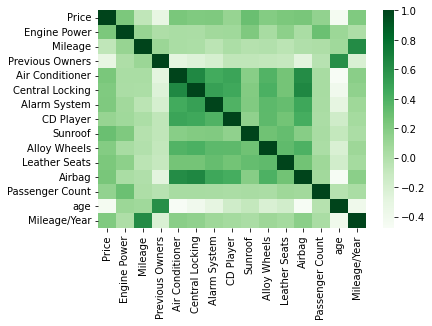

In [32]:
sns.heatmap(df.corr(),cmap='Greens')

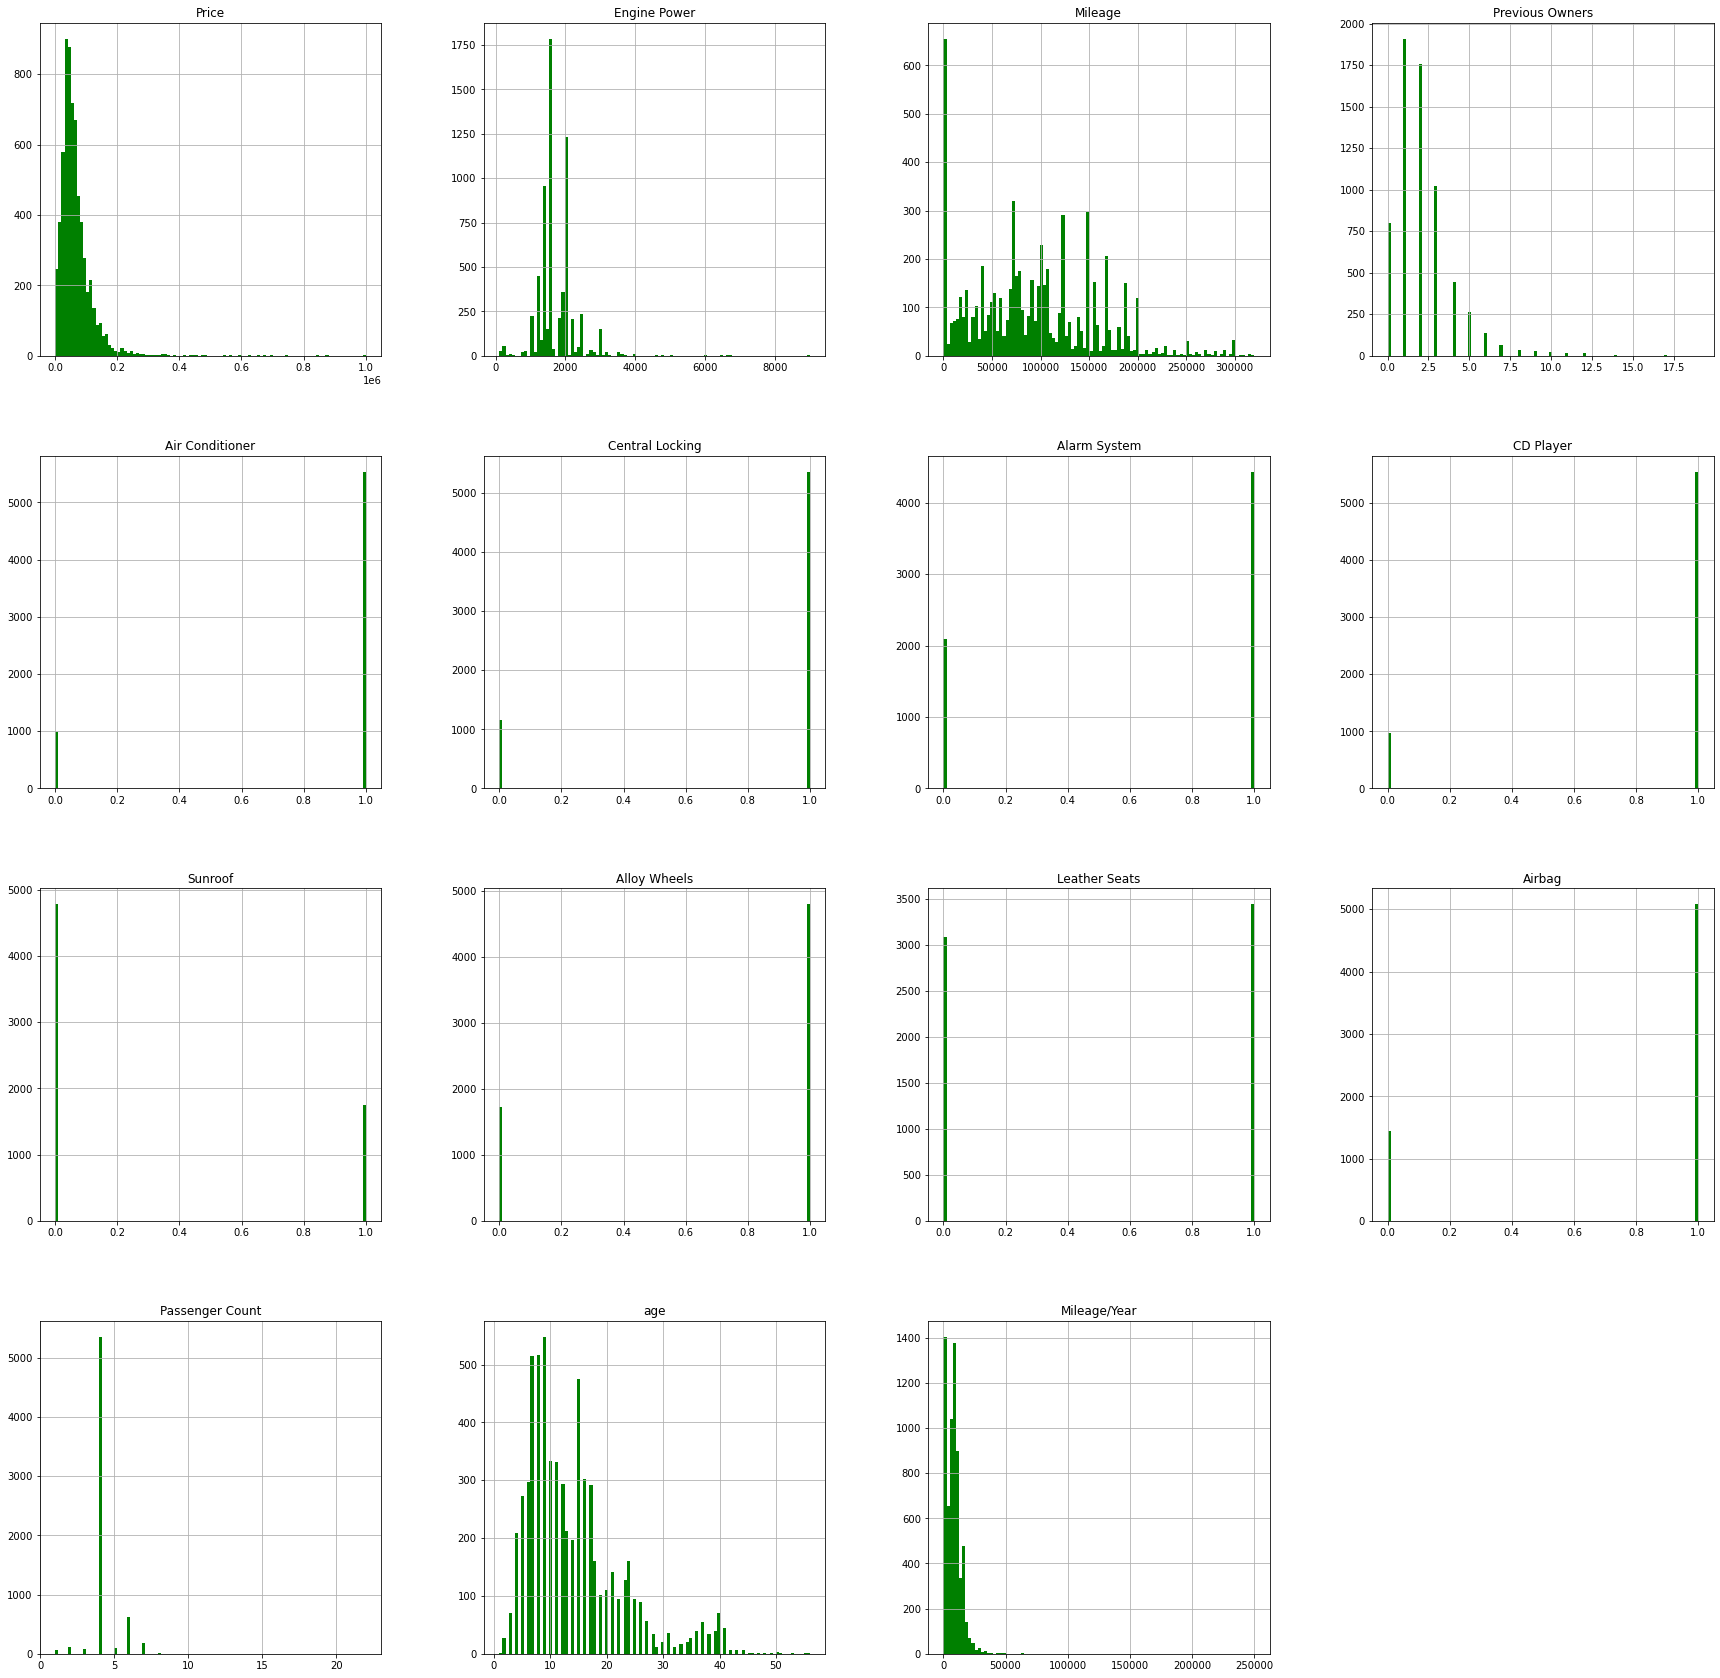

In [33]:
df.hist(bins=100, figsize=(30,30),color='g')
plt.show()

<AxesSubplot:>

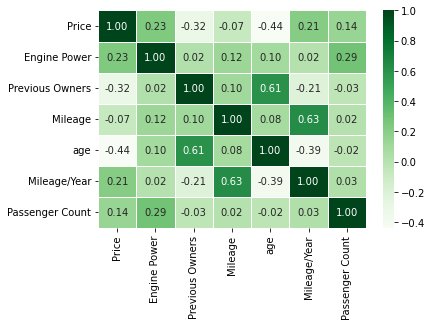

In [34]:
corr_matrix = df[['Price', 'Engine Power','Previous Owners', 'Mileage', 'age', 'Mileage/Year','Passenger Count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)

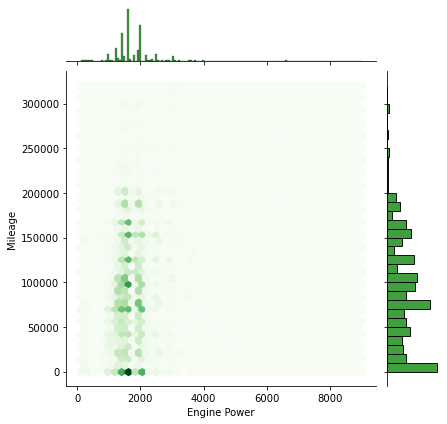

In [35]:
sns.jointplot(x='Engine Power',y='Mileage',data=df,kind='hex',cmap='Greens',color='g')